# **House Price Prediction Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Import and preprocess the dataset.

* Load the dataset and convert categorical features into numerical ones.
* This step involves reading the CSV file into a Pandas DataFrame and then applying appropriate encoding techniques for non-numeric columns.

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/SiddardhaShayini/House-Price-Prediction-Linear-Regression/refs/heads/main/Dataset/Housing.csv')

In [3]:
# Display initial information and head of the dataframe
print("Initial DataFrame Info:")
df.info()
print("\nInitial DataFrame Head:")
df.head()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Initial DataFrame Head:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Preprocessing Categorical Features

In [4]:
# Convert binary categorical features ('Yes'/'No') to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

- Convert 'furnishingstatus' using one-hot encoding
- Transform the 'furnishingstatus' column into numerical features.
- Description: One-hot encoding creates new binary columns for each category in 'furnishingstatus'.

In [5]:
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishing')
df = pd.concat([df, furnishing_status_dummies], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True) # Drop original column

In [6]:
print("\nDataFrame after converting categorical features:")
df.head()


DataFrame after converting categorical features:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


Scaling Numerical Features
* Normalize numerical features to a common scale to prevent features with larger values from dominating the model training.
* MinMaxScaler scales features to a given range, typically 0 to 1. Here, we'll scale 'price' and 'area'.

In [7]:
scaler = MinMaxScaler()
df[['price', 'area']] = scaler.fit_transform(df[['price', 'area']])

In [8]:
print("\nDataFrame after scaling 'price' and 'area':")
df.head()


DataFrame after scaling 'price' and 'area':


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,True,False,False
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,True,False,False
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,False,True,False
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,True,False,False
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,True,False,False


### Split data into train-test sets.

* Divide the dataset into training and testing subsets to evaluate the model's performance on unseen data.
* The `train_test_split` function from scikit-learn is used to perform this split.
* We'll set a test size of 30% and a random state for reproducibility.

In [9]:
X = df.drop('price', axis=1) # All columns except 'price' are features
y = df['price'] # 'price' is the target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (381, 14)
Testing set shape: (164, 14)


### Fit a Linear Regression model using sklearn.linear_model.

* Train a simple linear regression model to predict 'price' based on 'area'.
* Then train a multiple linear regression model using all features.
* An instance of `LinearRegression` is created and then fitted to the training data.

In [12]:
# --- Simple Linear Regression (Area vs. Price) ---
print("\n--- Simple Linear Regression (Area vs. Price) ---")
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train[['area']], y_train)


--- Simple Linear Regression (Area vs. Price) ---


LinearRegression()

In [13]:
# --- Multiple Linear Regression (All Features) ---
print("\n--- Multiple Linear Regression (All Features) ---")
multiple_lr_model = LinearRegression()
multiple_lr_model.fit(X_train, y_train)


--- Multiple Linear Regression (All Features) ---


LinearRegression()

### Evaluate model using MAE, MSE, R².

* Assess the performance of the trained models using common regression metrics.
* We'll make predictions on the test set and then calculate Mean Absolute Error, Mean Squared Error, and R-squared for both simple and multiple linear regression models.

In [14]:
# --- Evaluate Simple Linear Regression ---
y_pred_simple = simple_lr_model.predict(X_test[['area']])

In [15]:
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

In [16]:

print(f"\nSimple Linear Regression - MAE: {mae_simple:.3f}")
print(f"Simple Linear Regression - MSE: {mse_simple:.3f}")
print(f"Simple Linear Regression - R-squared: {r2_simple:.3f}")


Simple Linear Regression - MAE: 0.120
Simple Linear Regression - MSE: 0.024
Simple Linear Regression - R-squared: 0.258


**Simple Linear Regression:**
- This model is okay, explaining about 26% of house price changes based only on house area.
- Its predictions are, on average, off by about 12% of the price range.

In [17]:
# --- Evaluate Multiple Linear Regression ---
y_pred_multiple = multiple_lr_model.predict(X_test)

In [18]:
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

In [19]:
print(f"\nMultiple Linear Regression - MAE: {mae_multiple:.3f}")
print(f"Multiple Linear Regression - MSE: {mse_multiple:.3f}")
print(f"Multiple Linear Regression - R-squared: {r2_multiple:.3f}")


Multiple Linear Regression - MAE: 0.080
Multiple Linear Regression - MSE: 0.011
Multiple Linear Regression - R-squared: 0.646



**Multiple Linear Regression:**
- This model is much better, explaining about 65% of house price changes using all available features.
- Its predictions are, on average, only off by about 8% of the price range, making it more accurate than the simple model.

### Plot regression line and interpret coefficients.

* Visualize the simple linear regression model's fit and understand the impact of features on the target variable in multiple linear regression.
* For simple linear regression, a scatter plot of 'area' vs 'price' with the regression line is generated. For multiple linear regression, coefficients are printed.

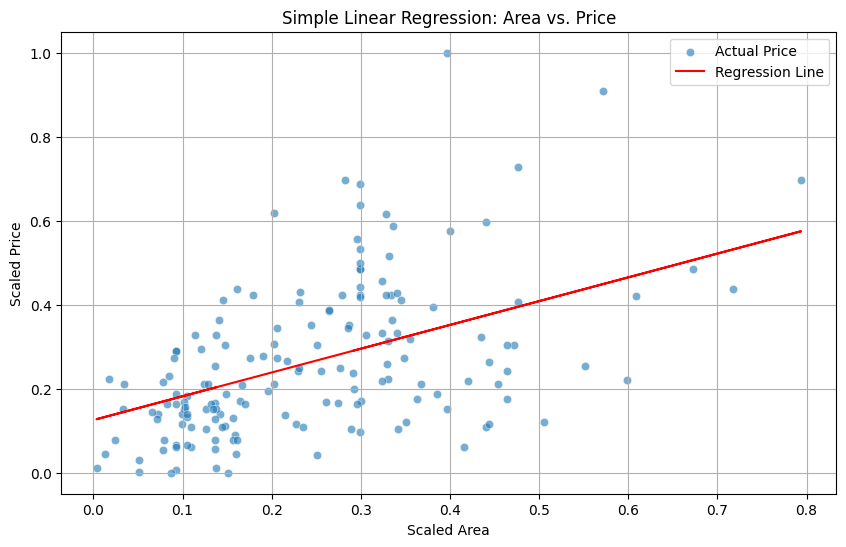

In [20]:
# --- Plotting Simple Linear Regression Line ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['area'], y=y_test, label='Actual Price', alpha=0.6)
plt.plot(X_test['area'], y_pred_simple, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Area vs. Price')
plt.xlabel('Scaled Area')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# --- Interpret Coefficients for Simple Linear Regression ---
print("\n--- Simple Linear Regression Coefficients ---")
print(f"Intercept: {simple_lr_model.intercept_:.3f}")
print(f"Coefficient for 'Area': {simple_lr_model.coef_[0]:.3f}")
print("Interpretation: For every one-unit increase in scaled 'area', the scaled 'price' is expected to increase by approximately 0.449 units.")
print("The intercept represents the predicted scaled 'price' when the scaled 'area' is zero.")


--- Simple Linear Regression Coefficients ---
Intercept: 0.125
Coefficient for 'Area': 0.566
Interpretation: For every one-unit increase in scaled 'area', the scaled 'price' is expected to increase by approximately 0.449 units.
The intercept represents the predicted scaled 'price' when the scaled 'area' is zero.


In [22]:
# --- Interpret Coefficients for Multiple Linear Regression ---
print("\n--- Multiple Linear Regression Coefficients ---")
print(f"Intercept: {multiple_lr_model.intercept_:.3f}")
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': multiple_lr_model.coef_})
print(coefficients_df.sort_values(by='Coefficient', ascending=False))


--- Multiple Linear Regression Coefficients ---
Intercept: -0.122
                      Feature  Coefficient
0                        area     0.319076
2                   bathrooms     0.096515
8             airconditioning     0.059380
7             hotwaterheating     0.053366
10                   prefarea     0.044086
6                    basement     0.041784
3                     stories     0.036127
4                    mainroad     0.035331
9                     parking     0.026243
5                   guestroom     0.023871
11       furnishing_furnished     0.014801
1                    bedrooms     0.007004
12  furnishing_semi-furnished     0.004268
13     furnishing_unfurnished    -0.019069


In [23]:
print("\nInterpretation of Multiple Linear Regression Coefficients:")
print("Each coefficient represents the average change in the scaled 'price' for a one-unit increase in the corresponding feature, holding all other features constant.")
print("- A positive coefficient indicates a positive relationship with price (e.g., higher 'area' or 'airconditioning' tend to increase price).")
print("- A negative coefficient indicates a negative relationship with price (e.g., sometimes 'stories' might have a complex relationship or 'unfurnished' status).")
print("Note: The magnitude of coefficients can be compared for features that are on a similar scale (which they are after scaling for 'area' and 'price' and binary encoding for others).")
print("For binary features (0/1), the coefficient represents the average difference in scaled price between the two categories (e.g., having 'mainroad' vs. not having 'mainroad').")


Interpretation of Multiple Linear Regression Coefficients:
Each coefficient represents the average change in the scaled 'price' for a one-unit increase in the corresponding feature, holding all other features constant.
- A positive coefficient indicates a positive relationship with price (e.g., higher 'area' or 'airconditioning' tend to increase price).
- A negative coefficient indicates a negative relationship with price (e.g., sometimes 'stories' might have a complex relationship or 'unfurnished' status).
Note: The magnitude of coefficients can be compared for features that are on a similar scale (which they are after scaling for 'area' and 'price' and binary encoding for others).
For binary features (0/1), the coefficient represents the average difference in scaled price between the two categories (e.g., having 'mainroad' vs. not having 'mainroad').


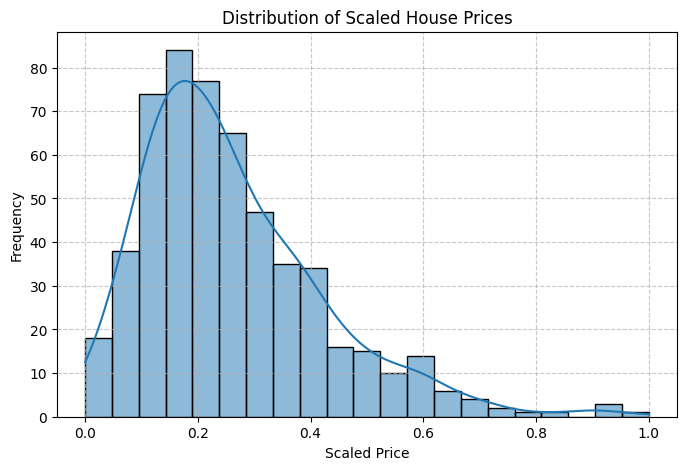

In [24]:
# Distribution of Target Variable ('price')
# Visualize the distribution of the target variable to check for skewness or outliers.
# A histogram with a KDE plot shows the probability density of prices.
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Scaled House Prices')
plt.xlabel('Scaled Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

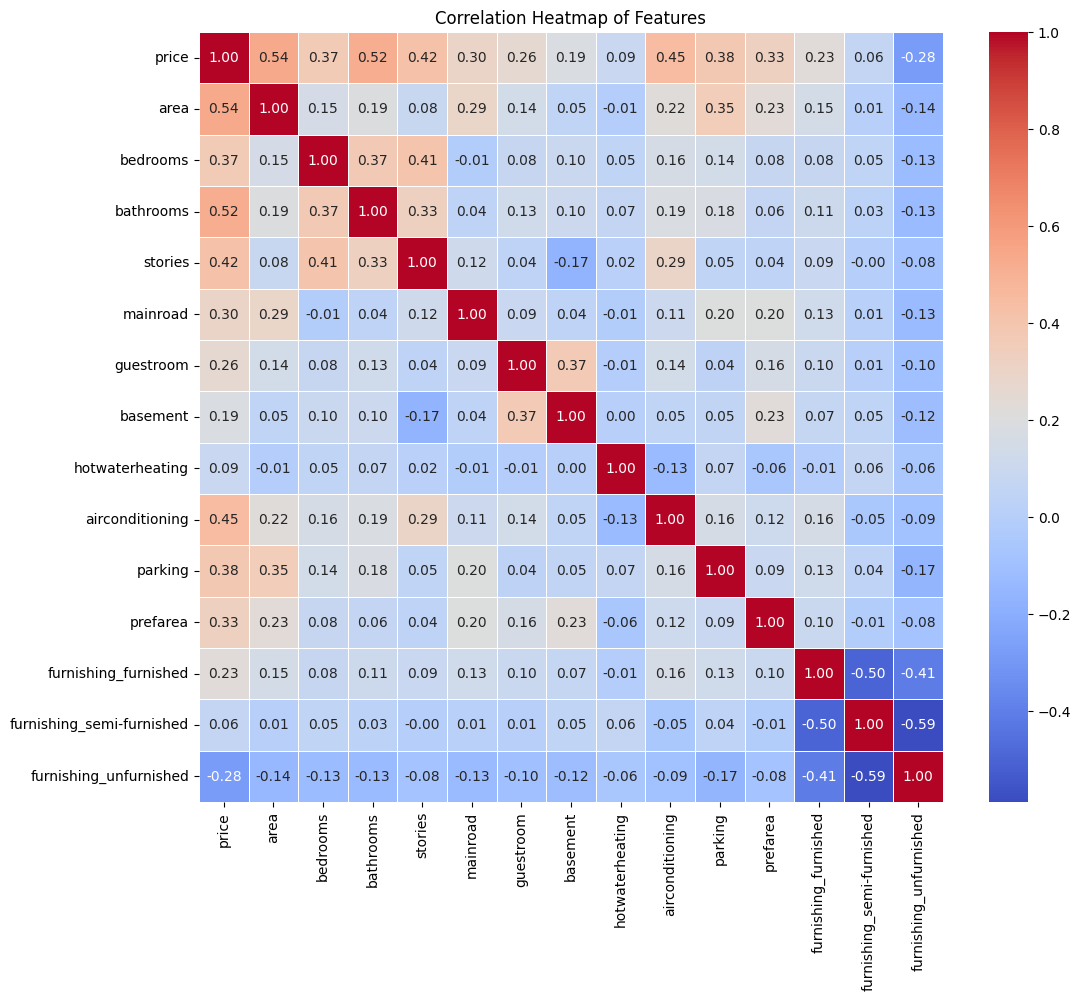

In [25]:
# Correlation Heatmap
# Understand the linear relationships between all features in the dataset.
# A heatmap visually represents the correlation matrix, with colors indicating strength and direction.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

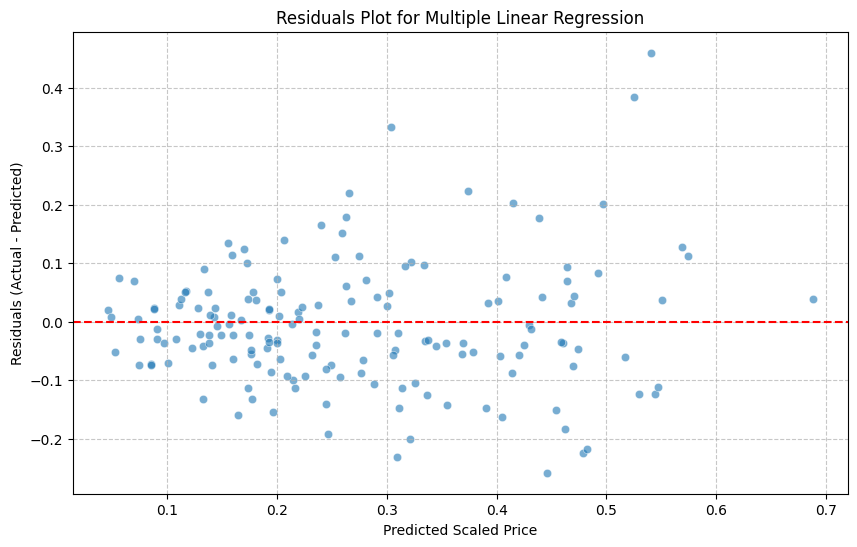

In [26]:

# Residuals Plot for Multiple Linear Regression
# Check the assumptions of linear regression:
# - Homoscedasticity (constant variance of residuals)
# - Linearity (residuals randomly scattered around zero)
# A scatter plot of predicted values vs. residuals.
residuals = y_test - y_pred_multiple
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_multiple, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot for Multiple Linear Regression')
plt.xlabel('Predicted Scaled Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

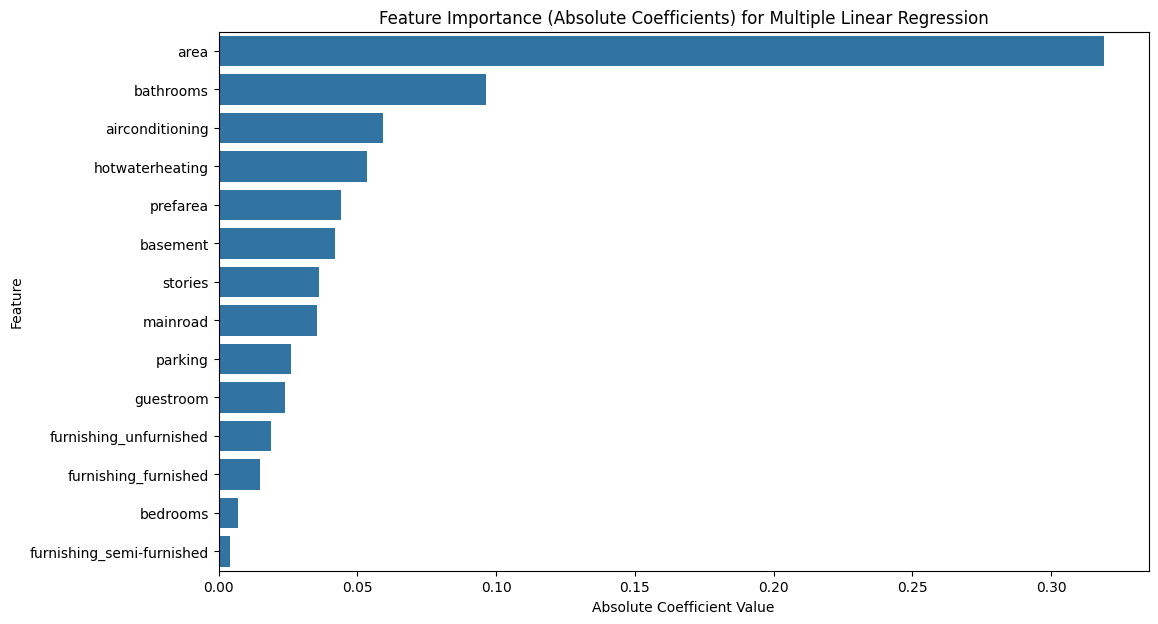

In [27]:
# Feature Importance (Absolute Coefficients for Multiple Linear Regression)
# Quickly identify which features have the most significant impact on price.
# A bar plot of the absolute values of the coefficients.
plt.figure(figsize=(12, 7))
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
sns.barplot(x='Abs_Coefficient', y='Feature', data=sorted_coefficients)
plt.title('Feature Importance (Absolute Coefficients) for Multiple Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

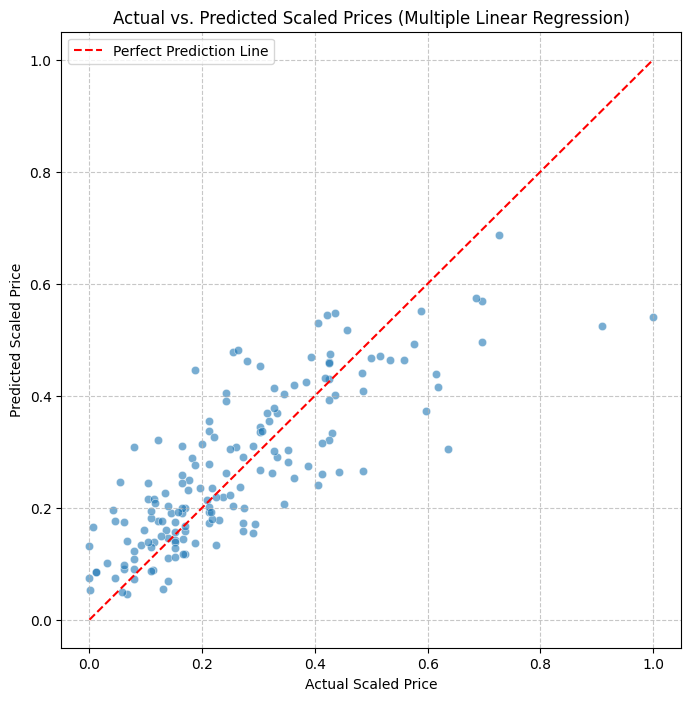

In [28]:
# Actual vs. Predicted Plot for Multiple Linear Regression
# Visually assess how well the model's predictions track the actual values.
# A scatter plot comparing actual prices with predicted prices. A perfect model
# would have all points lying on the y=x line.
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_multiple, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Scaled Prices (Multiple Linear Regression)')
plt.xlabel('Actual Scaled Price')
plt.ylabel('Predicted Scaled Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()